In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, Input, concatenate

In [2]:
plt.rcParams['figure.dpi'] = 300

### Data import

In [3]:
# Load data matrices

X = np.load('../data/X.npy')
y = np.load('../data/y.npy')
X_static = np.load('../data/X_static.npy')
dates = np.load('../data/dates.npy')

In [4]:
X.shape

(3616, 30, 1)

In [5]:
y.shape

(3616,)

In [6]:
X[0]

array([[3.73805382e-03],
       [3.80103710e-03],
       [3.22058326e-03],
       [3.15419321e-03],
       [3.39250376e-03],
       [3.07419425e-03],
       [2.66736088e-03],
       [3.16610896e-03],
       [2.95844120e-03],
       [2.36266710e-03],
       [3.91338110e-03],
       [3.34995203e-03],
       [2.72693738e-03],
       [9.70257879e-04],
       [1.87583478e-03],
       [2.36436935e-03],
       [2.69459917e-03],
       [1.23239766e-03],
       [1.69997797e-06],
       [4.56189542e-04],
       [6.48539321e-04],
       [1.22218416e-03],
       [0.00000000e+00],
       [5.80449295e-04],
       [3.52354524e-04],
       [7.04713593e-04],
       [5.22575045e-04],
       [1.12686039e-03],
       [1.41794071e-03],
       [1.93200905e-03]])

In [7]:
X_static[0]

array([0.00114082, 0.00085076, 0.00198761, 0.53333333, 0.09090909,
       0.        ])

In [8]:
y[0]

0.0017873222884113374

In [9]:
dates[0]

numpy.datetime64('2010-02-17T00:00:00.000000000')

### Train-test split

In [10]:
# Define 90% training split

train_size = int(len(X) * 0.9)

In [11]:
# Split dataset

X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]
X_static_train, X_static_test = X_static[:train_size], X_static[train_size:]

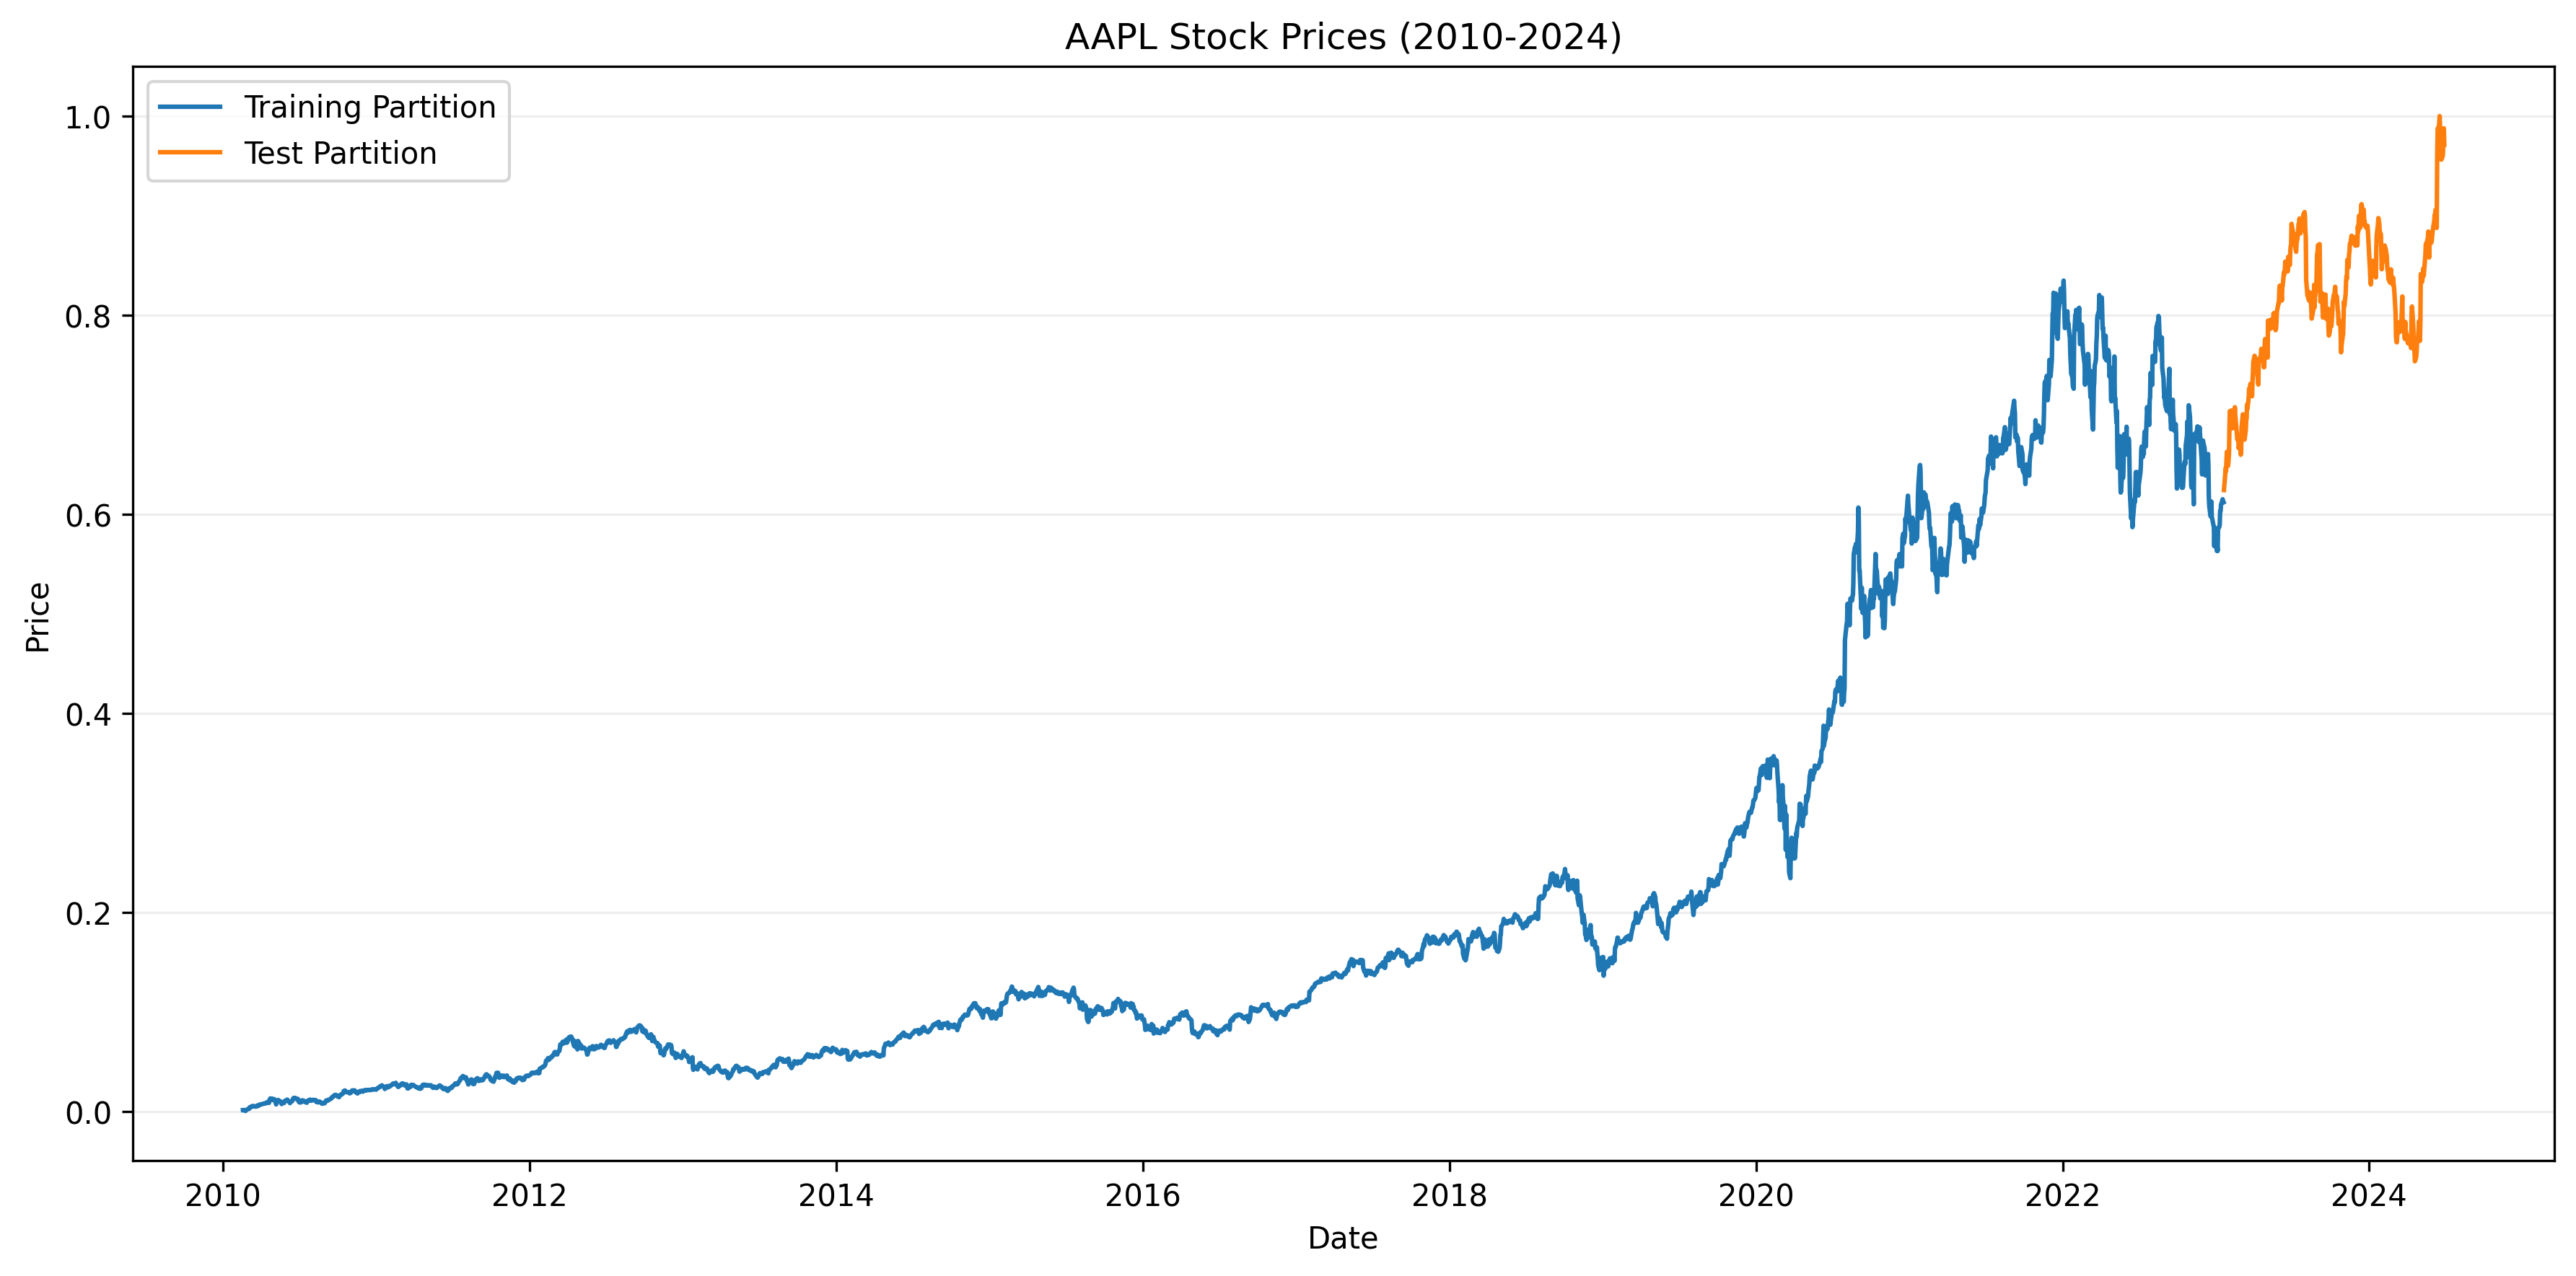

In [12]:
# Visualize split

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates[0:train_size], y_train, label='Training Partition')
ax.plot(dates[train_size:], y_test, label='Test Partition')
ax.set_title('AAPL Stock Prices (2010-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

### Sequential LSTM

In [35]:
# Define sequential architecture

model_sequential = Sequential()
model_sequential.add(Input(shape=(30, 1)))
model_sequential.add(LSTM(64))
model_sequential.add(Dense(32, activation='relu'))
model_sequential.add(Dense(32, activation='relu'))
model_sequential.add(Dense(1))

In [36]:
# Compile model

model_sequential.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',
                         metrics=['mean_absolute_error'])

In [37]:
model_sequential.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,065 (78.38 KB)

 Trainable params: 20,065 (78.38 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train model

h = model_sequential.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0679 - val_loss: 0.0013 - val_mean_absolute_error: 0.0294
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8183e-04 - mean_absolute_error: 0.0079 - val_loss: 9.0133e-04 - val_mean_absolute_error: 0.0243
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8005e-04 - mean_absolute_error: 0.0080 - val_loss: 9.8303e-04 - val_mean_absolute_error: 0.0258
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5144e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0018 - val_mean_absolute_error: 0.0376
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7332e-04 - mean_absolute_error: 0.0076 - val_loss: 4.0879e-04 - val_mean_absolute_error: 0.0156
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5585e-04 - mean_absolute_error: 0.0078 - val_loss: 4.0095e-04 - val_mean_absolute_error: 0.0153
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.29

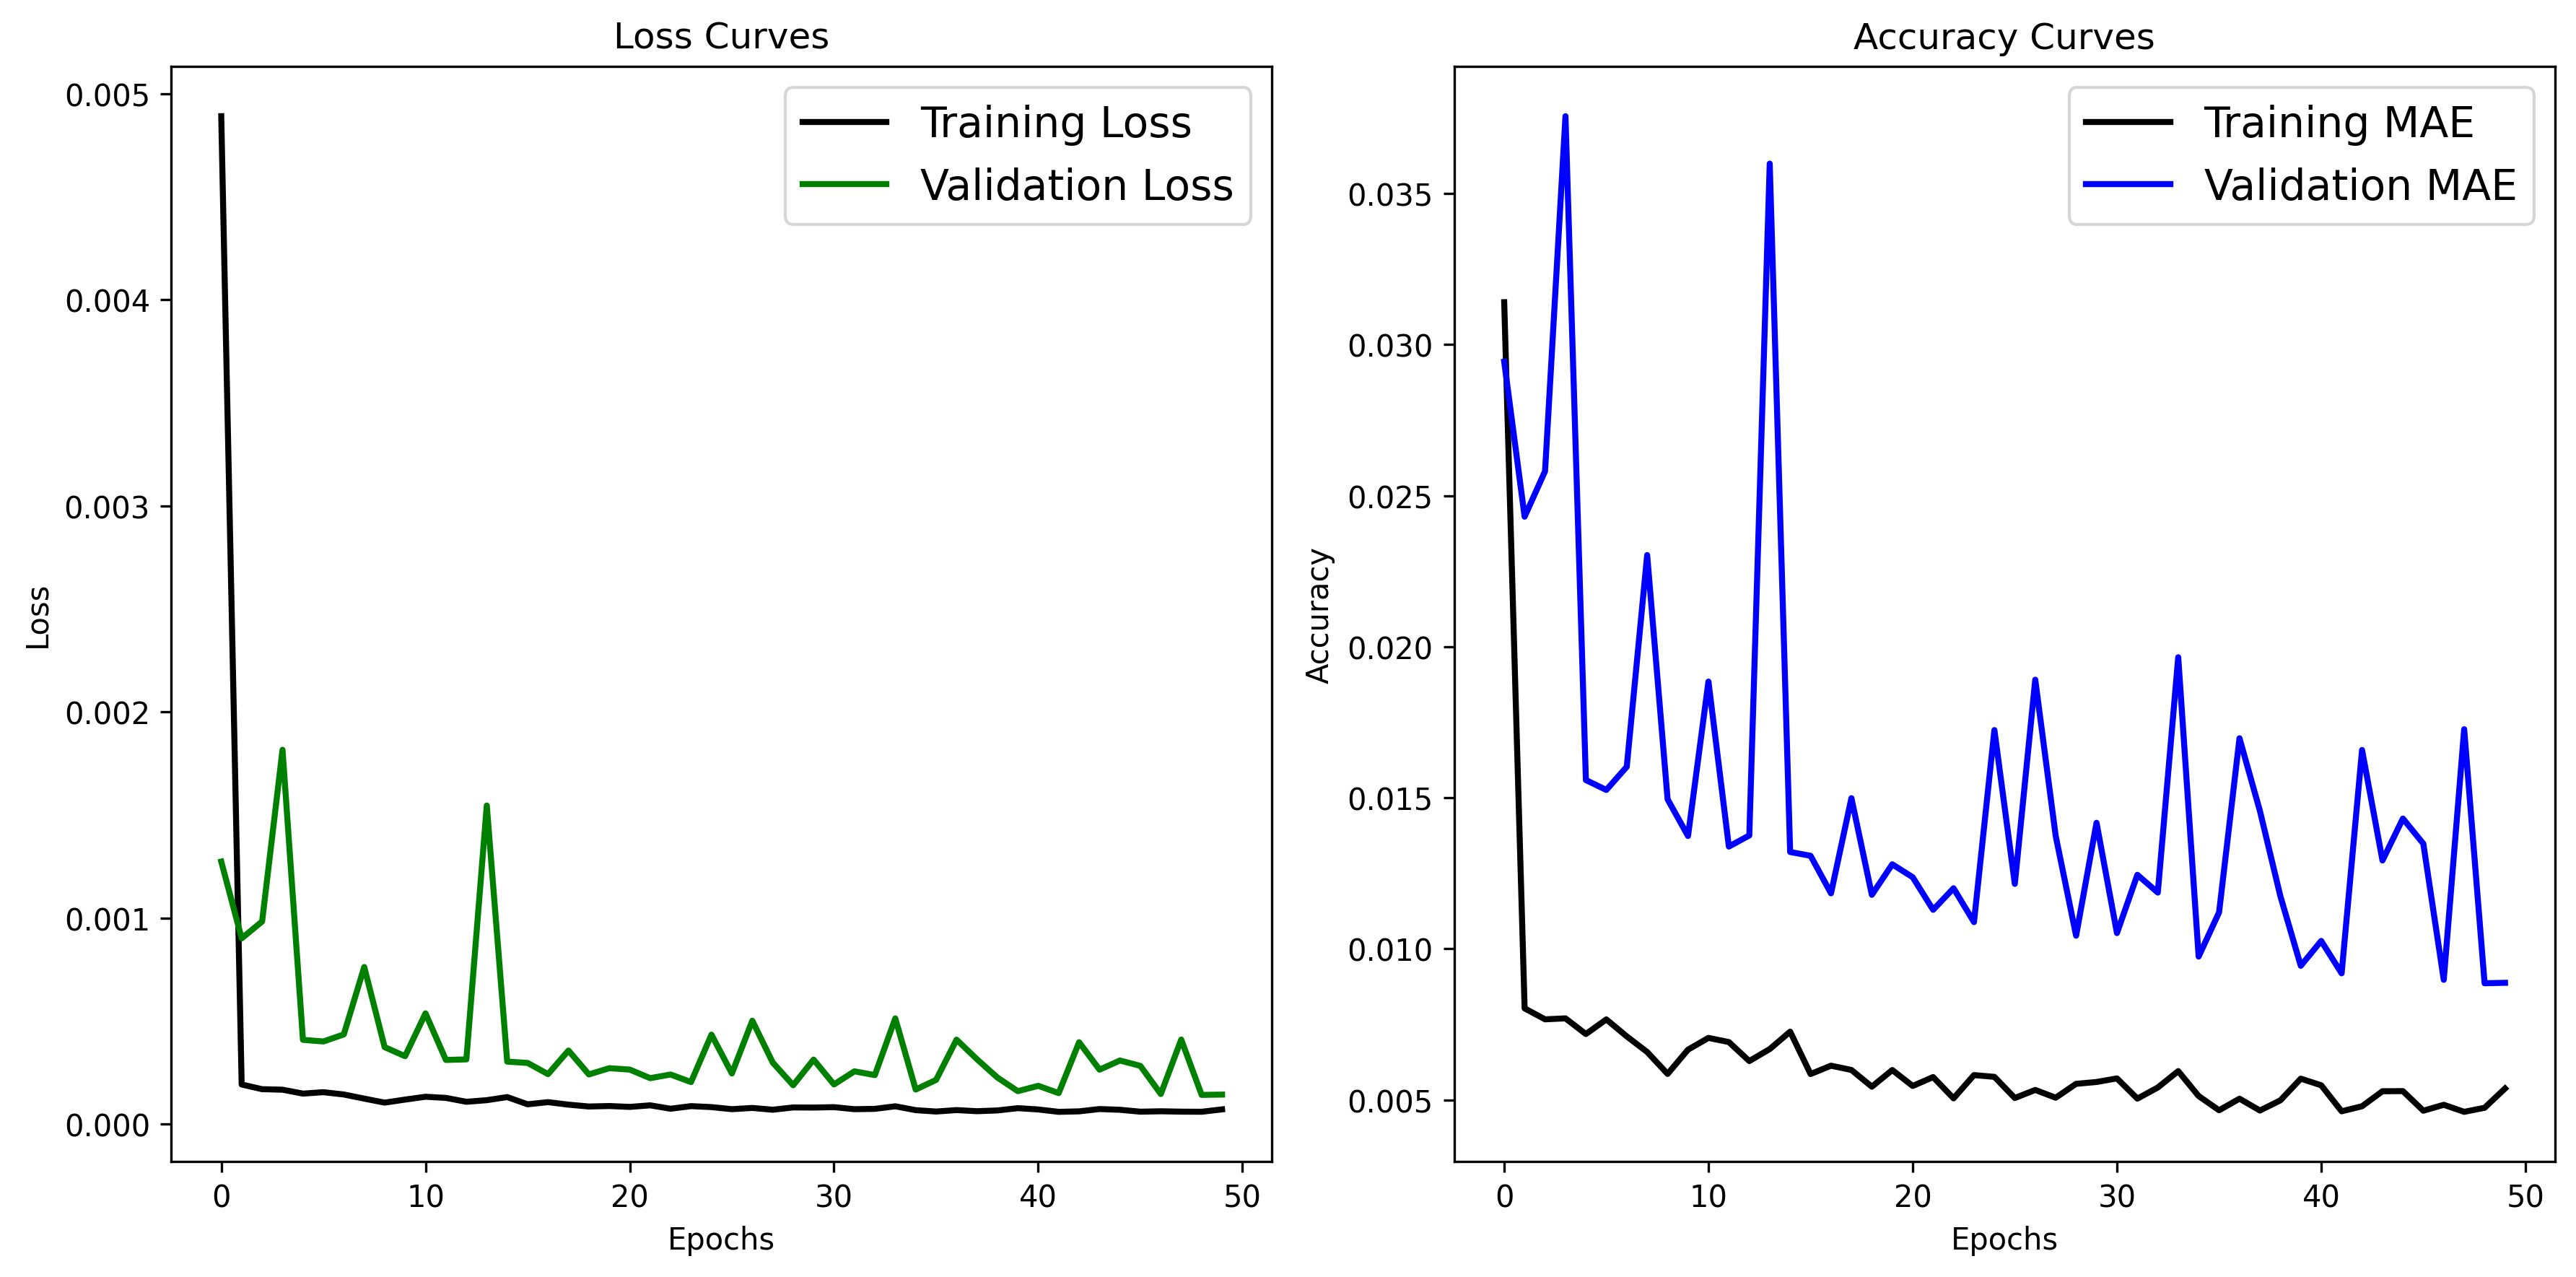

In [42]:
# Error visualization

fig, ax = plt.subplots(1, 2, figsize=[12, 6])

# Loss curves
ax[0].plot(h.history['loss'], 'black', linewidth=2.0)
ax[0].plot(h.history['val_loss'], 'green', linewidth=2.0)
ax[0].legend(['Training Loss', 'Validation Loss'], fontsize=14)
ax[0].set_xlabel('Epochs', fontsize=10)
ax[0].set_ylabel('Loss', fontsize=10)
ax[0].set_title('Loss Curves', fontsize=12)

# Accuracy curves
ax[1].plot(h.history['mean_absolute_error'], 'black', linewidth=2.0)
ax[1].plot(h.history['val_mean_absolute_error'], 'blue', linewidth=2.0)
ax[1].legend(['Training MAE', 'Validation MAE'], fontsize=14)
ax[1].set_xlabel('Epochs', fontsize=10)
ax[1].set_ylabel('Accuracy', fontsize=10)
ax[1].set_title('Accuracy Curves', fontsize=12)

plt.tight_layout()
plt.show()

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


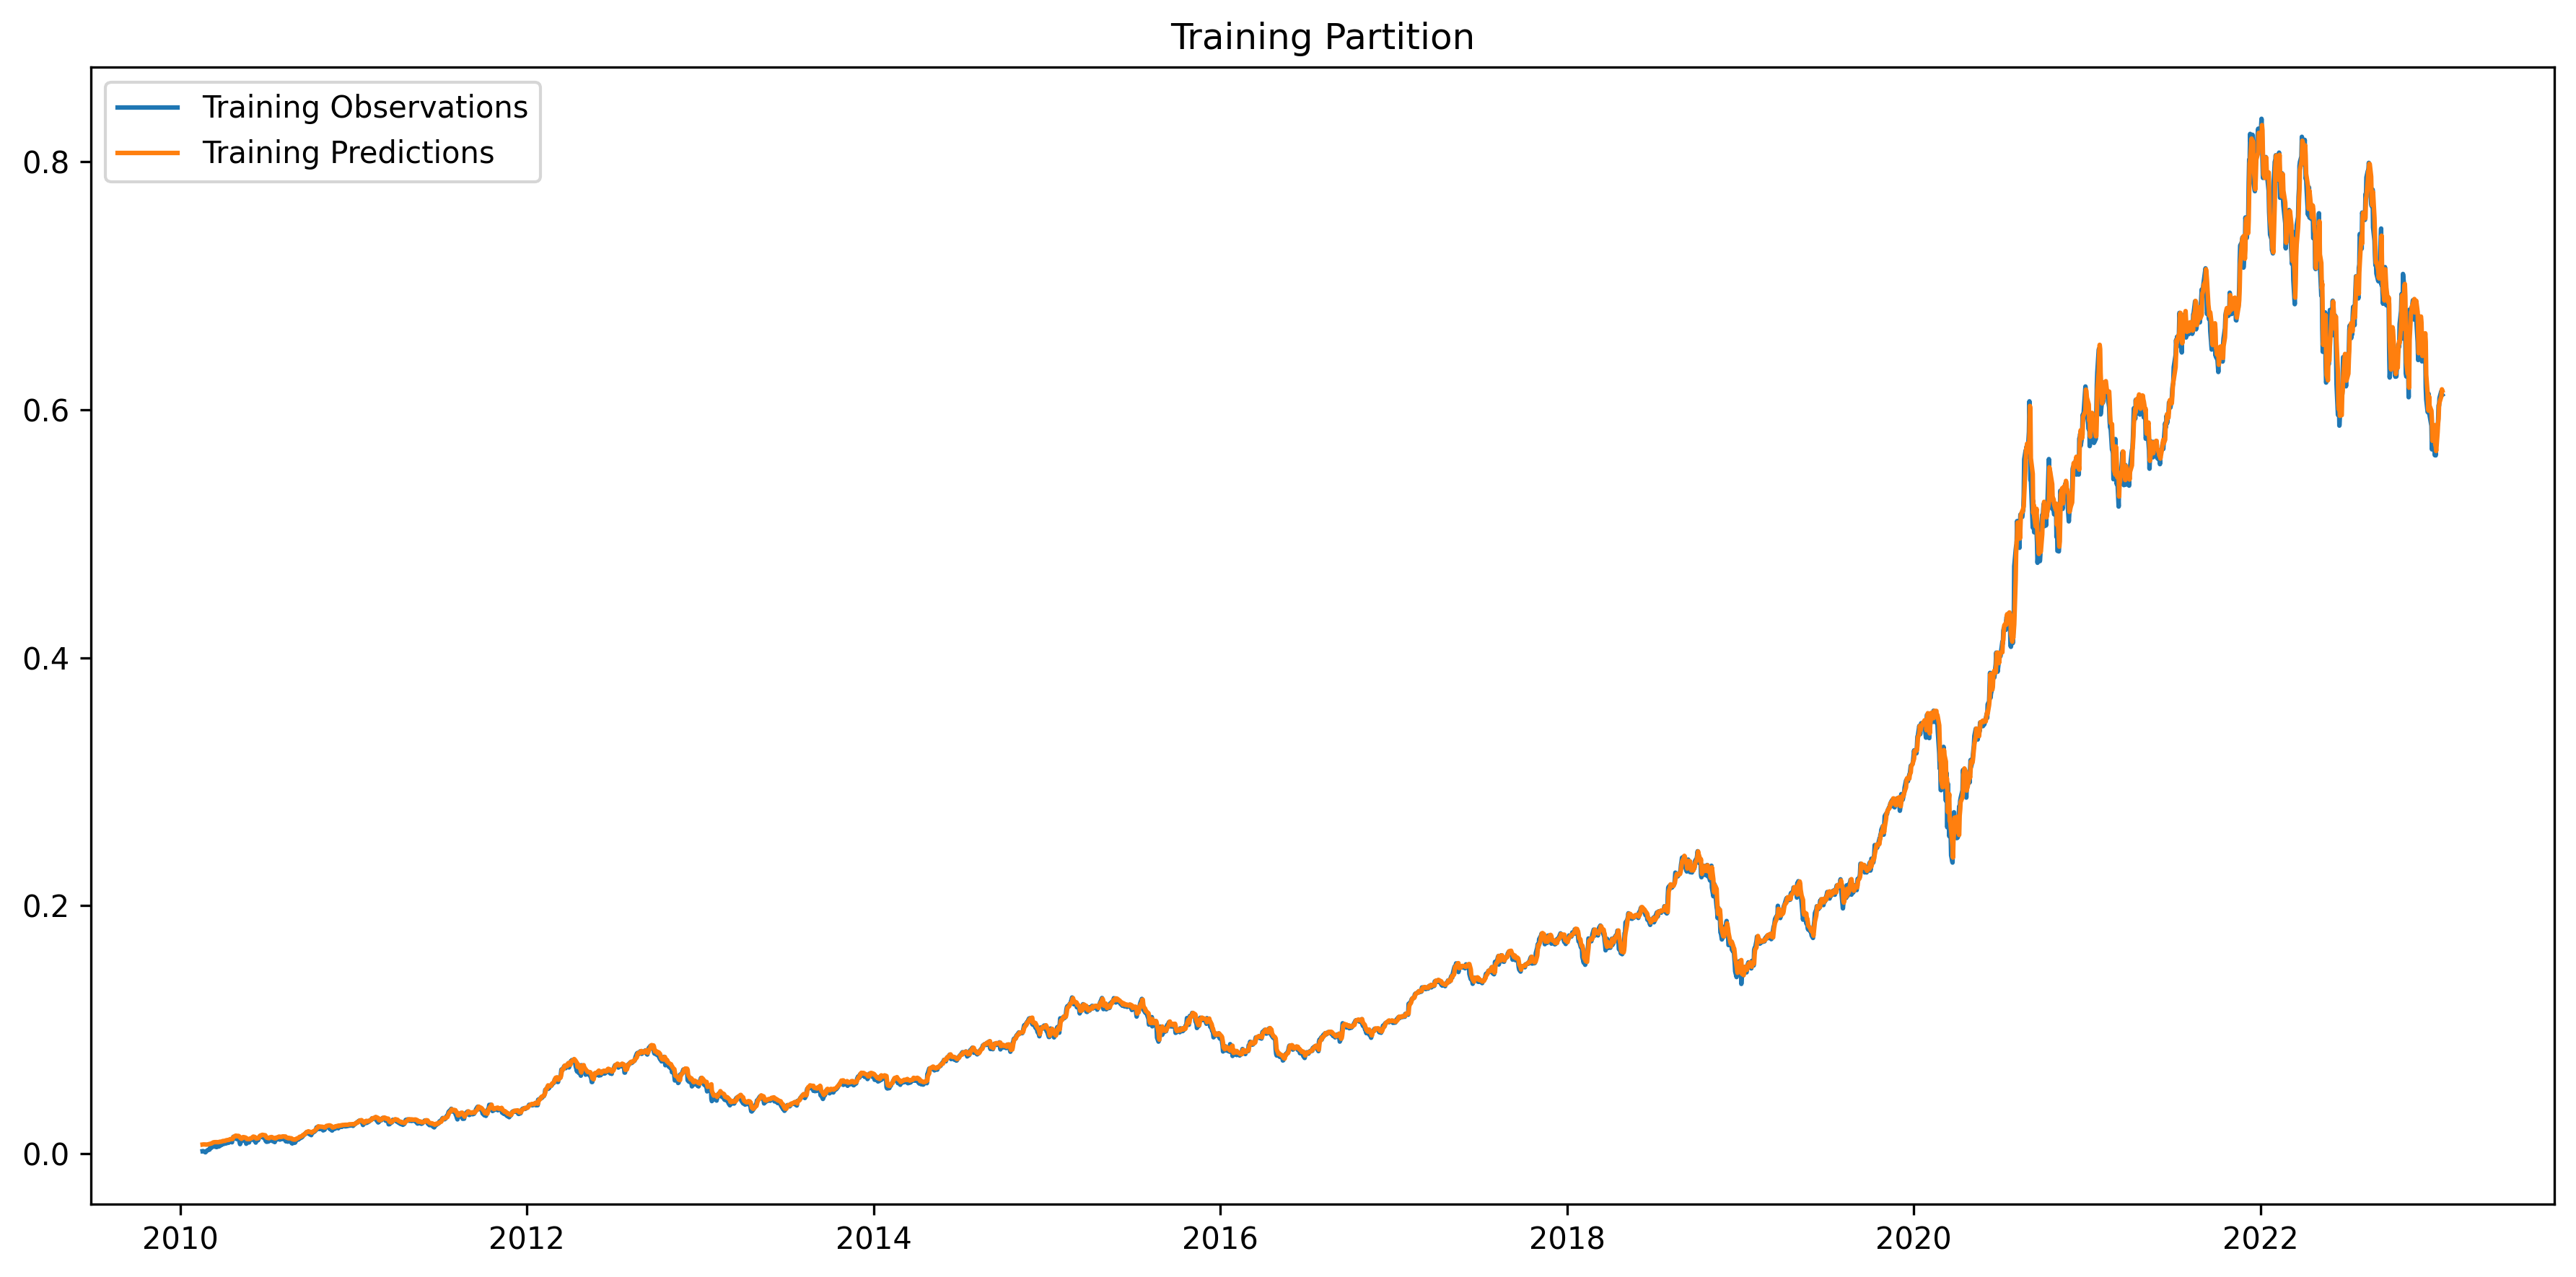

In [39]:
# Training set visualization

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates[0:train_size], y_train, label='Training Observations')
ax.plot(dates[0:train_size], model_sequential.predict(X_train).flatten(), label='Training Predictions')
ax.set_title('Training Partition')
ax.legend()
        
plt.tight_layout()
plt.show()

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


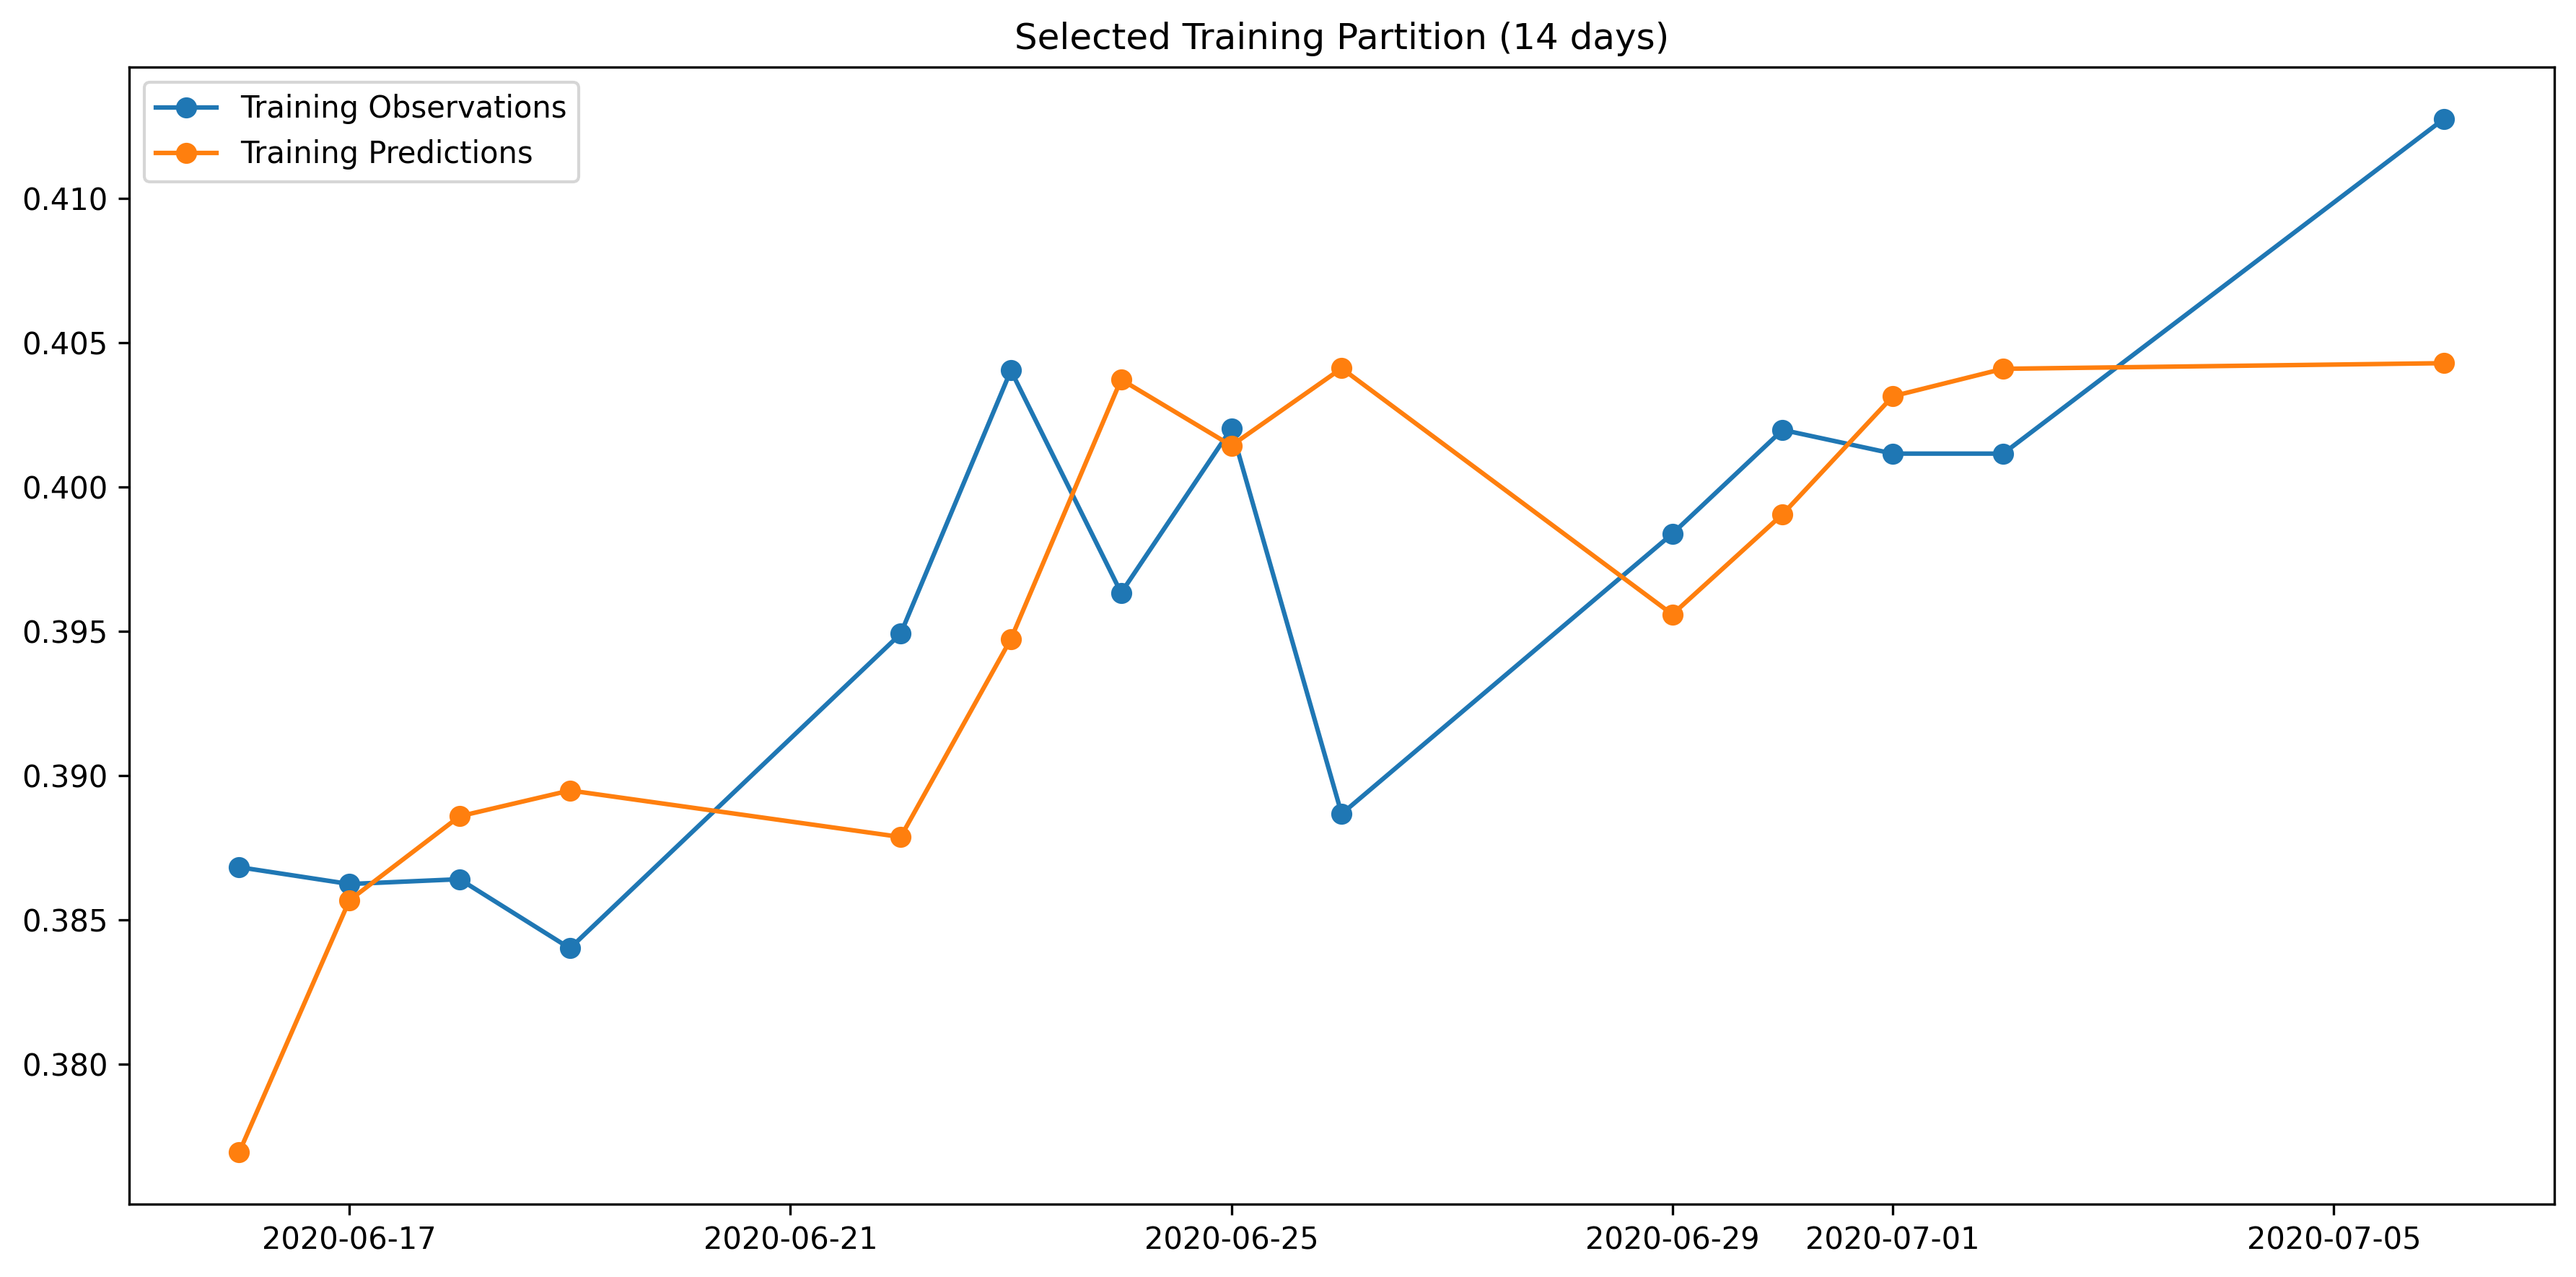

In [40]:
# Training subset visualization

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates[2600:2614], y_train[2600:2614], label='Training Observations', marker='o')
ax.plot(dates[2600:2614], model_sequential.predict(X_train).flatten()[2600:2614], label='Training Predictions', marker='o')
ax.set_title('Selected Training Partition (14 days)')
ax.legend()
        
plt.tight_layout()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


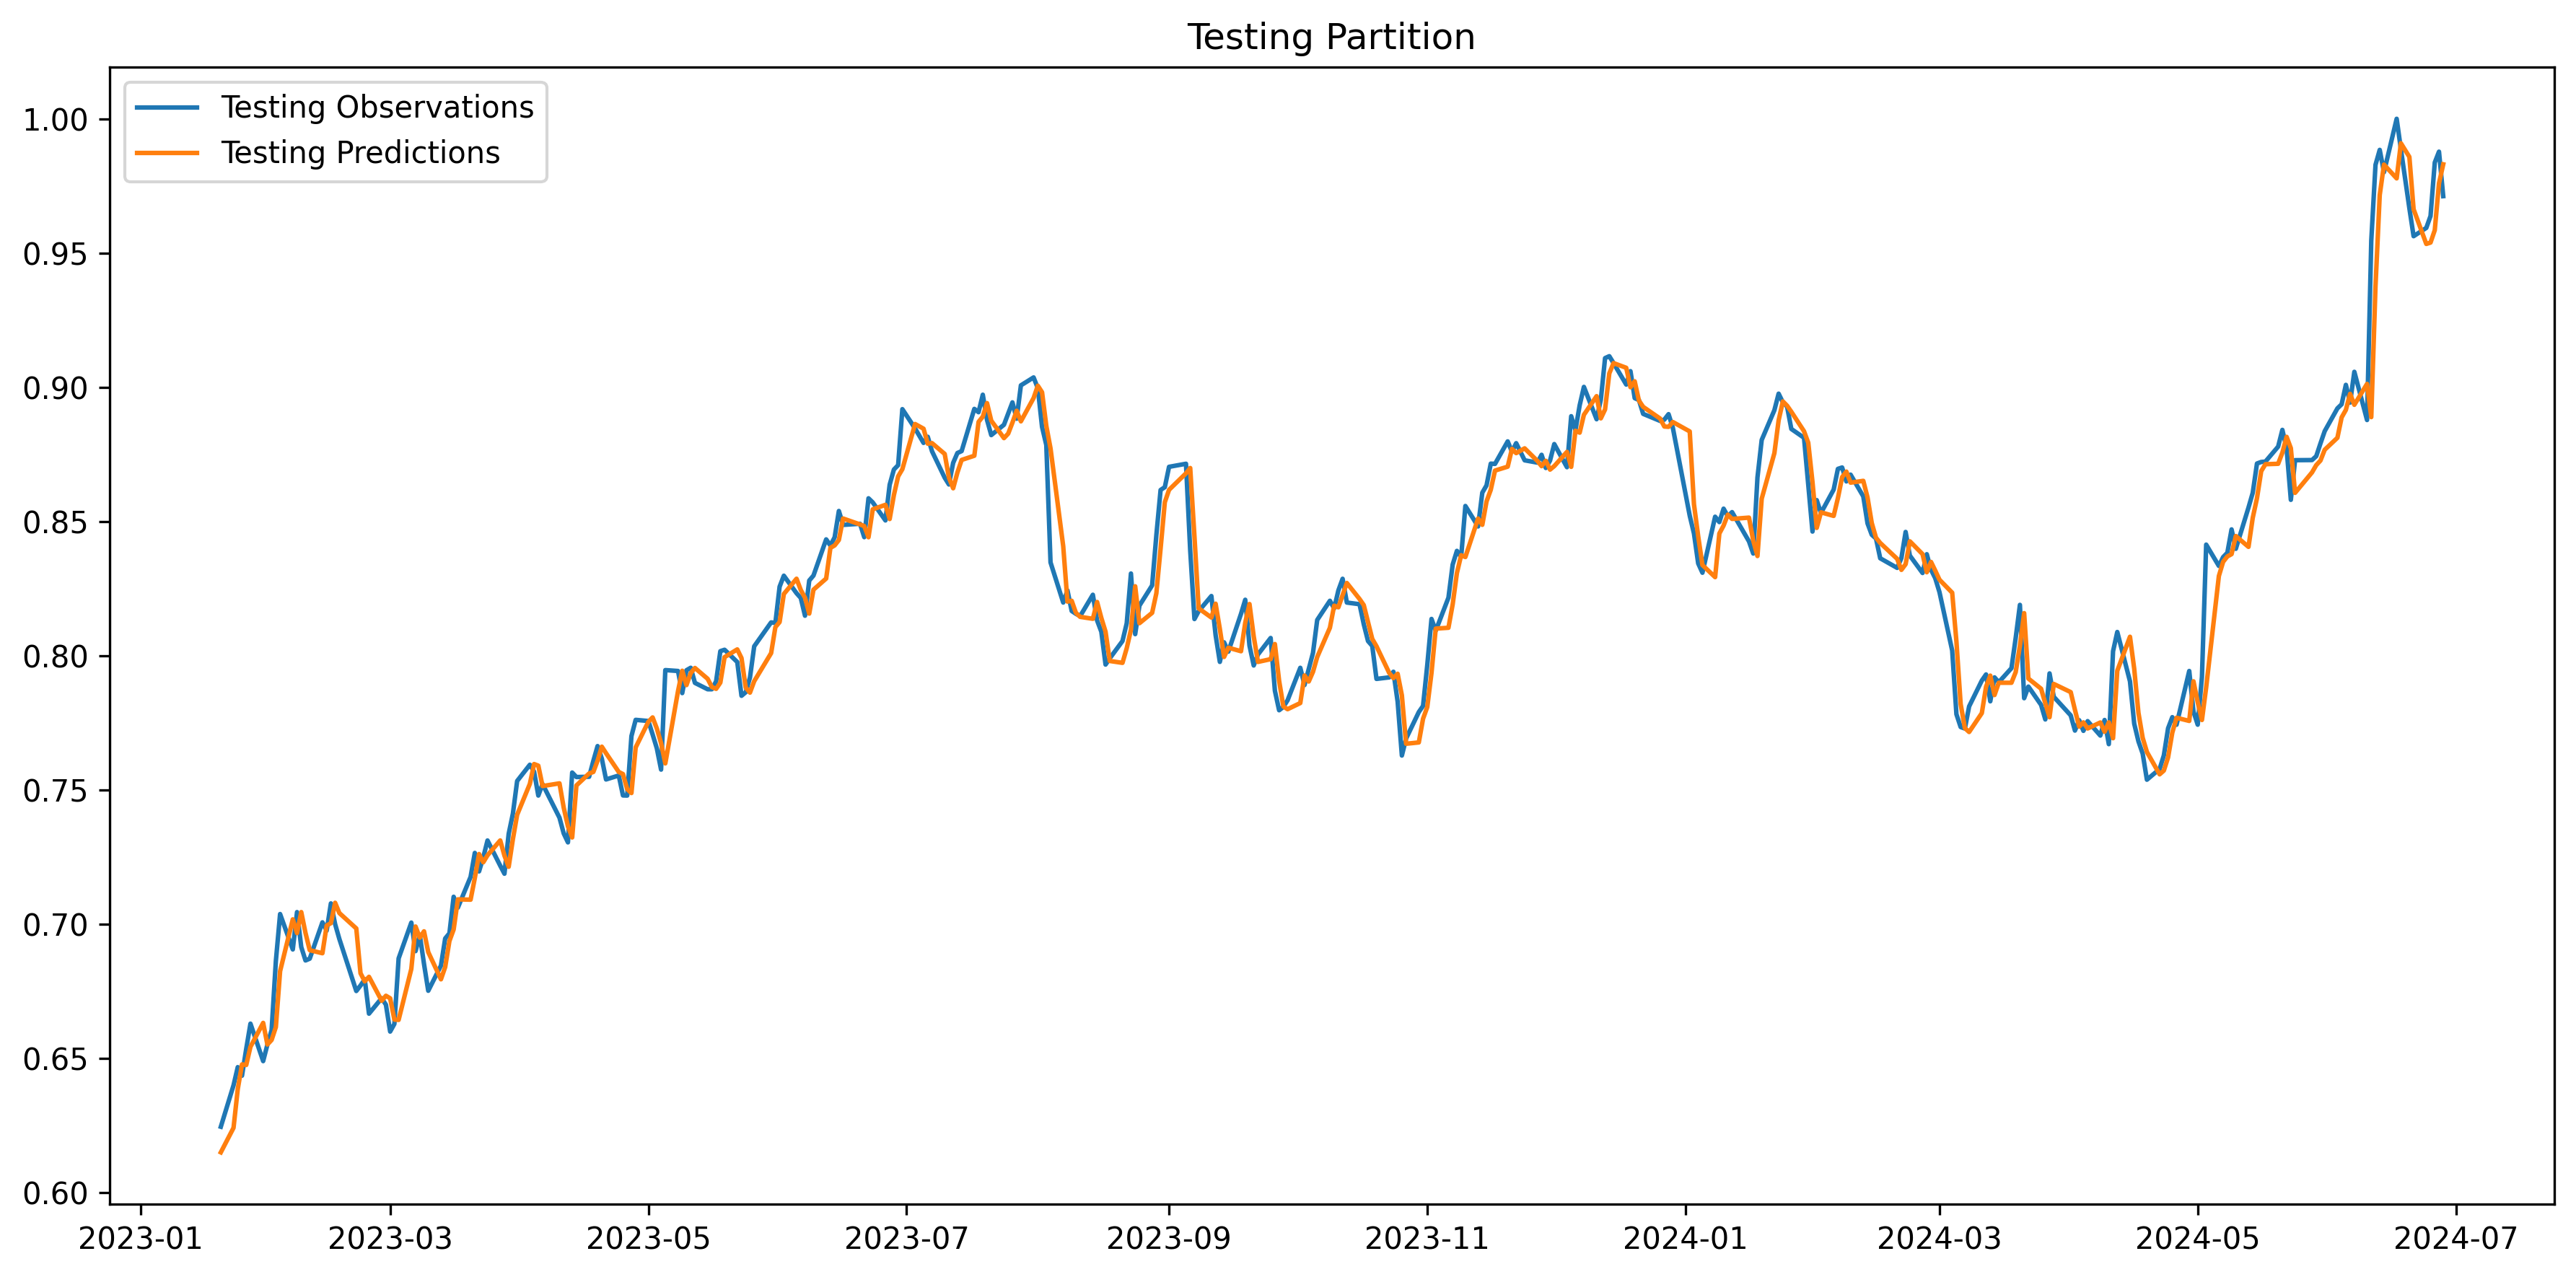

In [41]:
# Testing set visualization

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates[train_size:], y_test, label='Testing Observations')
ax.plot(dates[train_size:], model_sequential.predict(X_test).flatten(), label='Testing Predictions')
ax.set_title('Testing Partition')
ax.legend()
        
plt.tight_layout()
plt.show()

In [43]:
# Save model

model_sequential.save('../models/sequential_LSTM.keras')

### Functional LSTM

In [104]:
# Define sequential input

sequential_input = Input(shape=(30, 1))

x = LSTM(64)(sequential_input)

In [105]:
# Define static input

static_input = Input(shape=(6,))

In [106]:
# Merge inputs

merged = concatenate([x, static_input])

In [107]:
# Add dense layers

output = Dense(64, activation='relu')(merged)
output = Dense(32, activation='relu')(output)
output = Dense(32, activation='relu')(output)
output = Dense(16, activation='relu')(output)
output = Dense(1)(output)

In [108]:
# Compile model

model_functional = Model(inputs=[sequential_input, static_input], outputs=output)
model_functional.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',
                         metrics=['mean_absolute_error'])

In [109]:
model_functional.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 30, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_11 (LSTM)      │ (None, 64)        │     16,896 │ input_layer_19[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_20      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 70)        │          0 │ lstm_11[0][0],    │
│ (Concatenate)       │                   │            │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 64)        │      4,544 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 32)        │      2,080 │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 32)        │      1,056 │ dense_40[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 16)        │        528 │ dense_41[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 1)         │         17 │ dense_42[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 25,121 (98.13 KB)

 Trainable params: 25,121 (98.13 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# Train model

h_func = model_functional.fit([X_train, X_static_train], y_train, epochs=50,
                              validation_data=([X_test, X_static_test], y_test), verbose=1)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0733 - val_loss: 7.1143e-04 - val_mean_absolute_error: 0.0218
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0951e-04 - mean_absolute_error: 0.0095 - val_loss: 8.9189e-04 - val_mean_absolute_error: 0.0244
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9283e-04 - mean_absolute_error: 0.0088 - val_loss: 9.1516e-04 - val_mean_absolute_error: 0.0247
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8555e-04 - mean_absolute_error: 0.0085 - val_loss: 4.6238e-04 - val_mean_absolute_error: 0.0166
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5348e-04 - mean_absolute_error: 0.0078 - val_loss: 5.3116e-04 - val_mean_absolute_error: 0.0181
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2620e-04 - mean_absolute_error: 0.0067 - val_loss: 8.1845e-04 - val_mean_absolute_error: 0.0237
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - lo

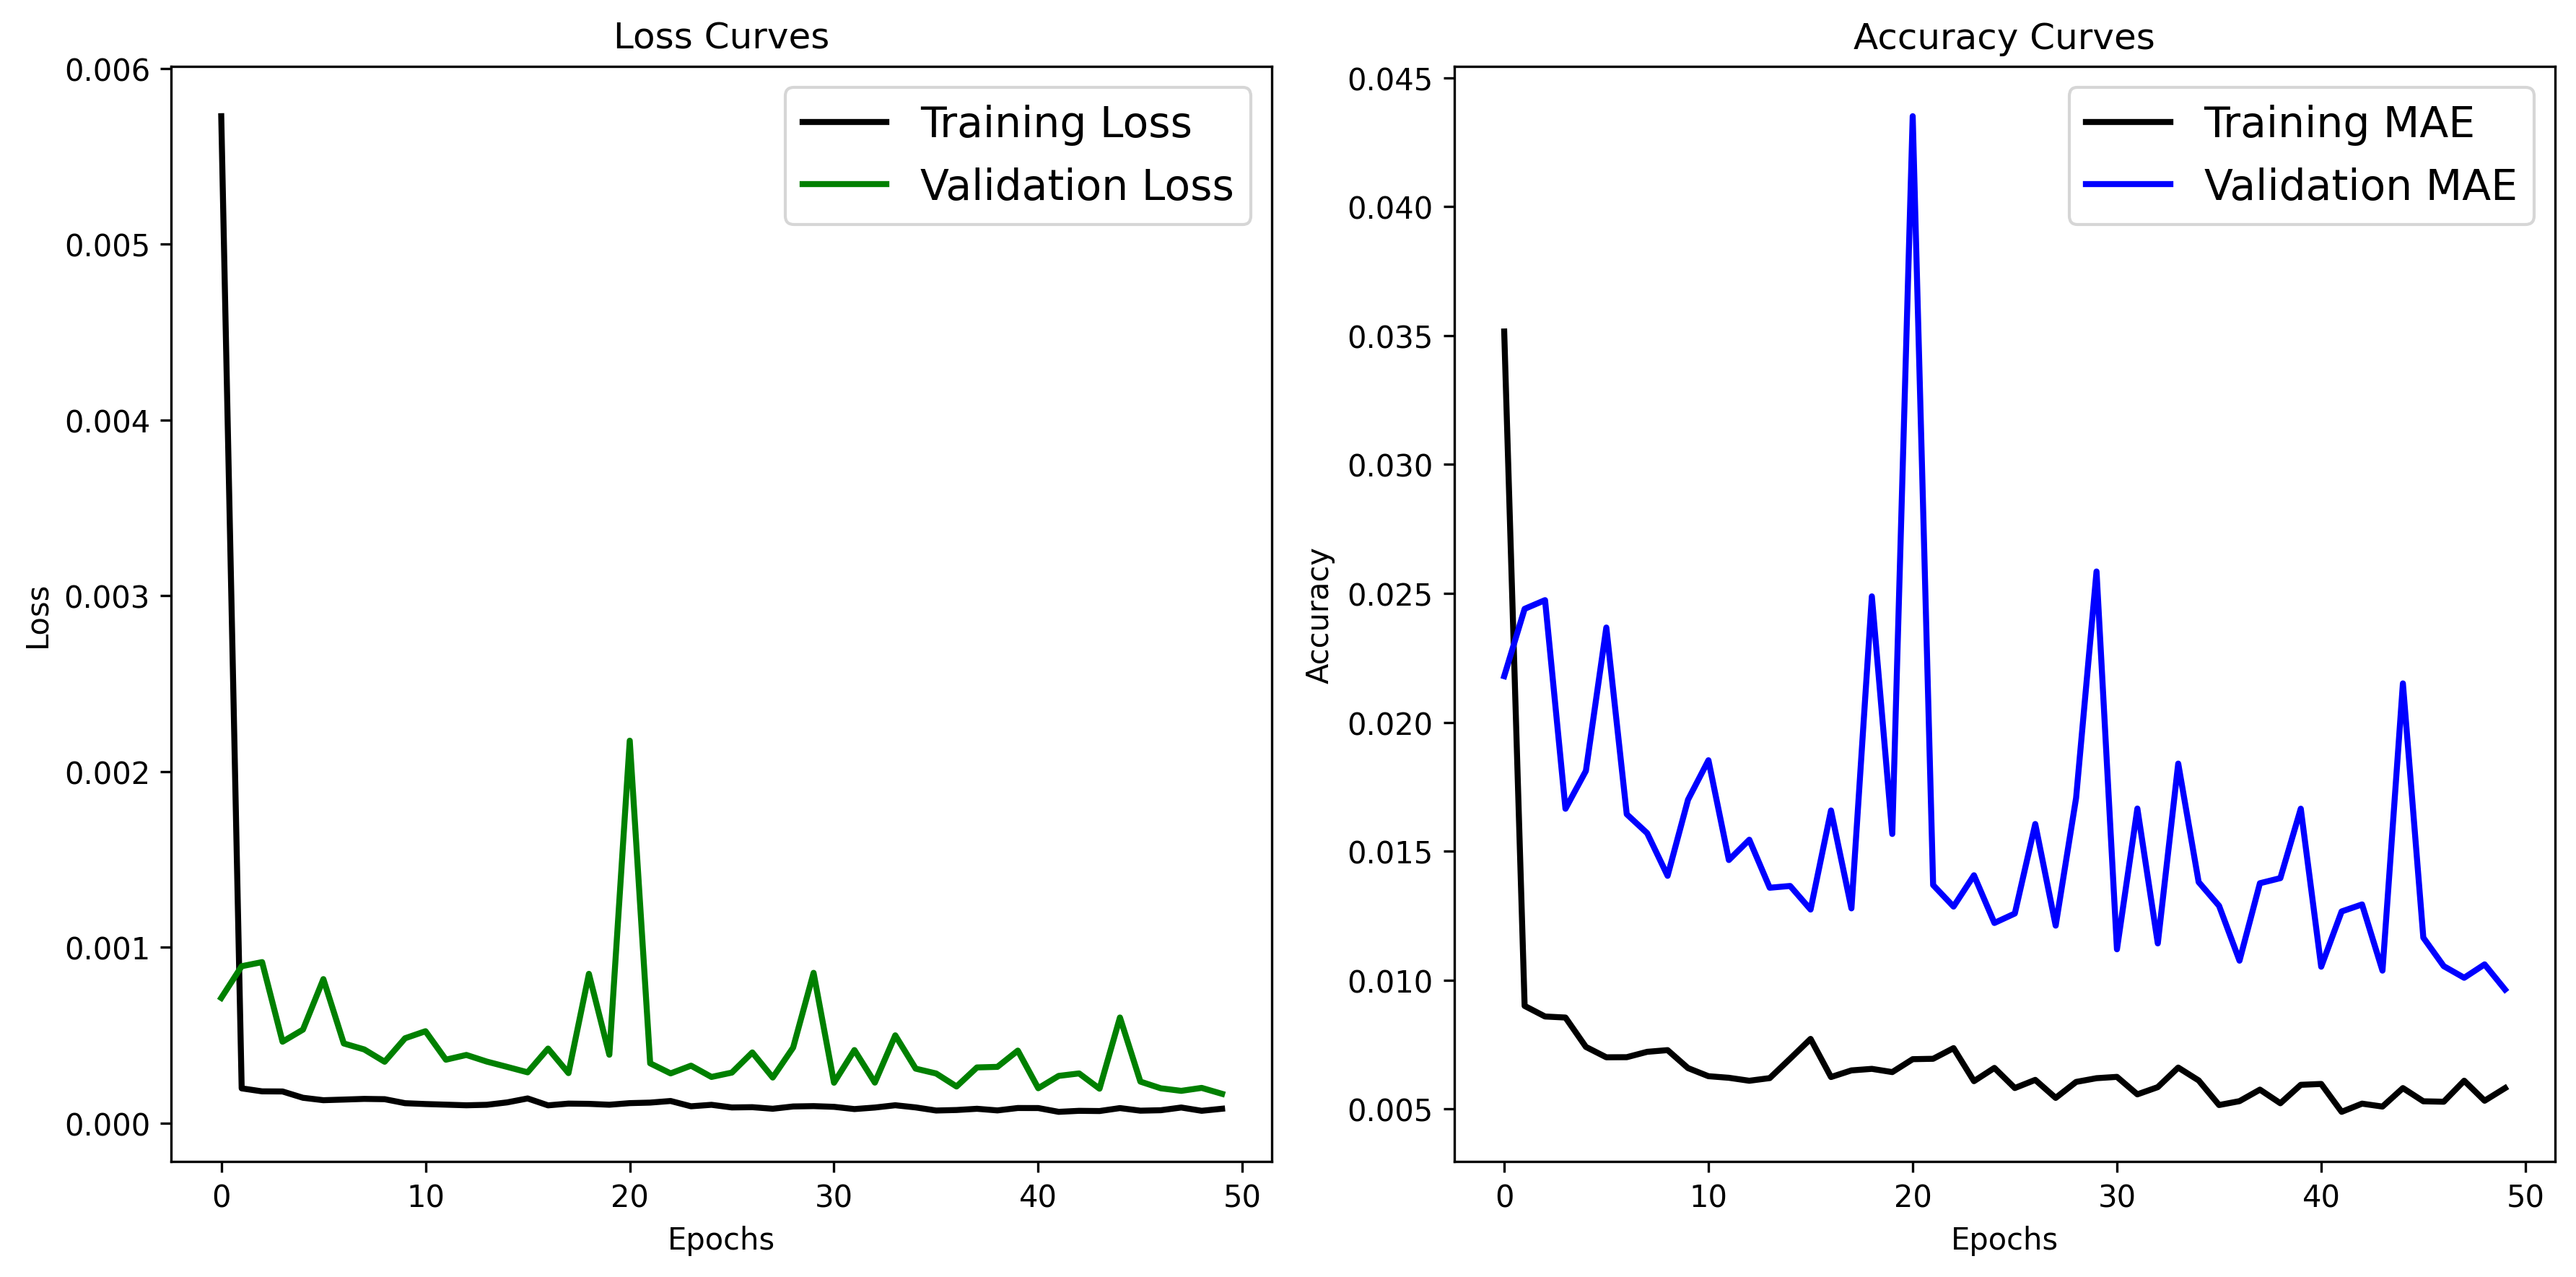

In [111]:
# Error visualization

fig, ax = plt.subplots(1, 2, figsize=[12, 6])

# Loss curves
ax[0].plot(h_func.history['loss'], 'black', linewidth=2.0)
ax[0].plot(h_func.history['val_loss'], 'green', linewidth=2.0)
ax[0].legend(['Training Loss', 'Validation Loss'], fontsize=14)
ax[0].set_xlabel('Epochs', fontsize=10)
ax[0].set_ylabel('Loss', fontsize=10)
ax[0].set_title('Loss Curves', fontsize=12)

# Accuracy curves
ax[1].plot(h_func.history['mean_absolute_error'], 'black', linewidth=2.0)
ax[1].plot(h_func.history['val_mean_absolute_error'], 'blue', linewidth=2.0)
ax[1].legend(['Training MAE', 'Validation MAE'], fontsize=14)
ax[1].set_xlabel('Epochs', fontsize=10)
ax[1].set_ylabel('Accuracy', fontsize=10)
ax[1].set_title('Accuracy Curves', fontsize=12)

plt.tight_layout()
plt.show()

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


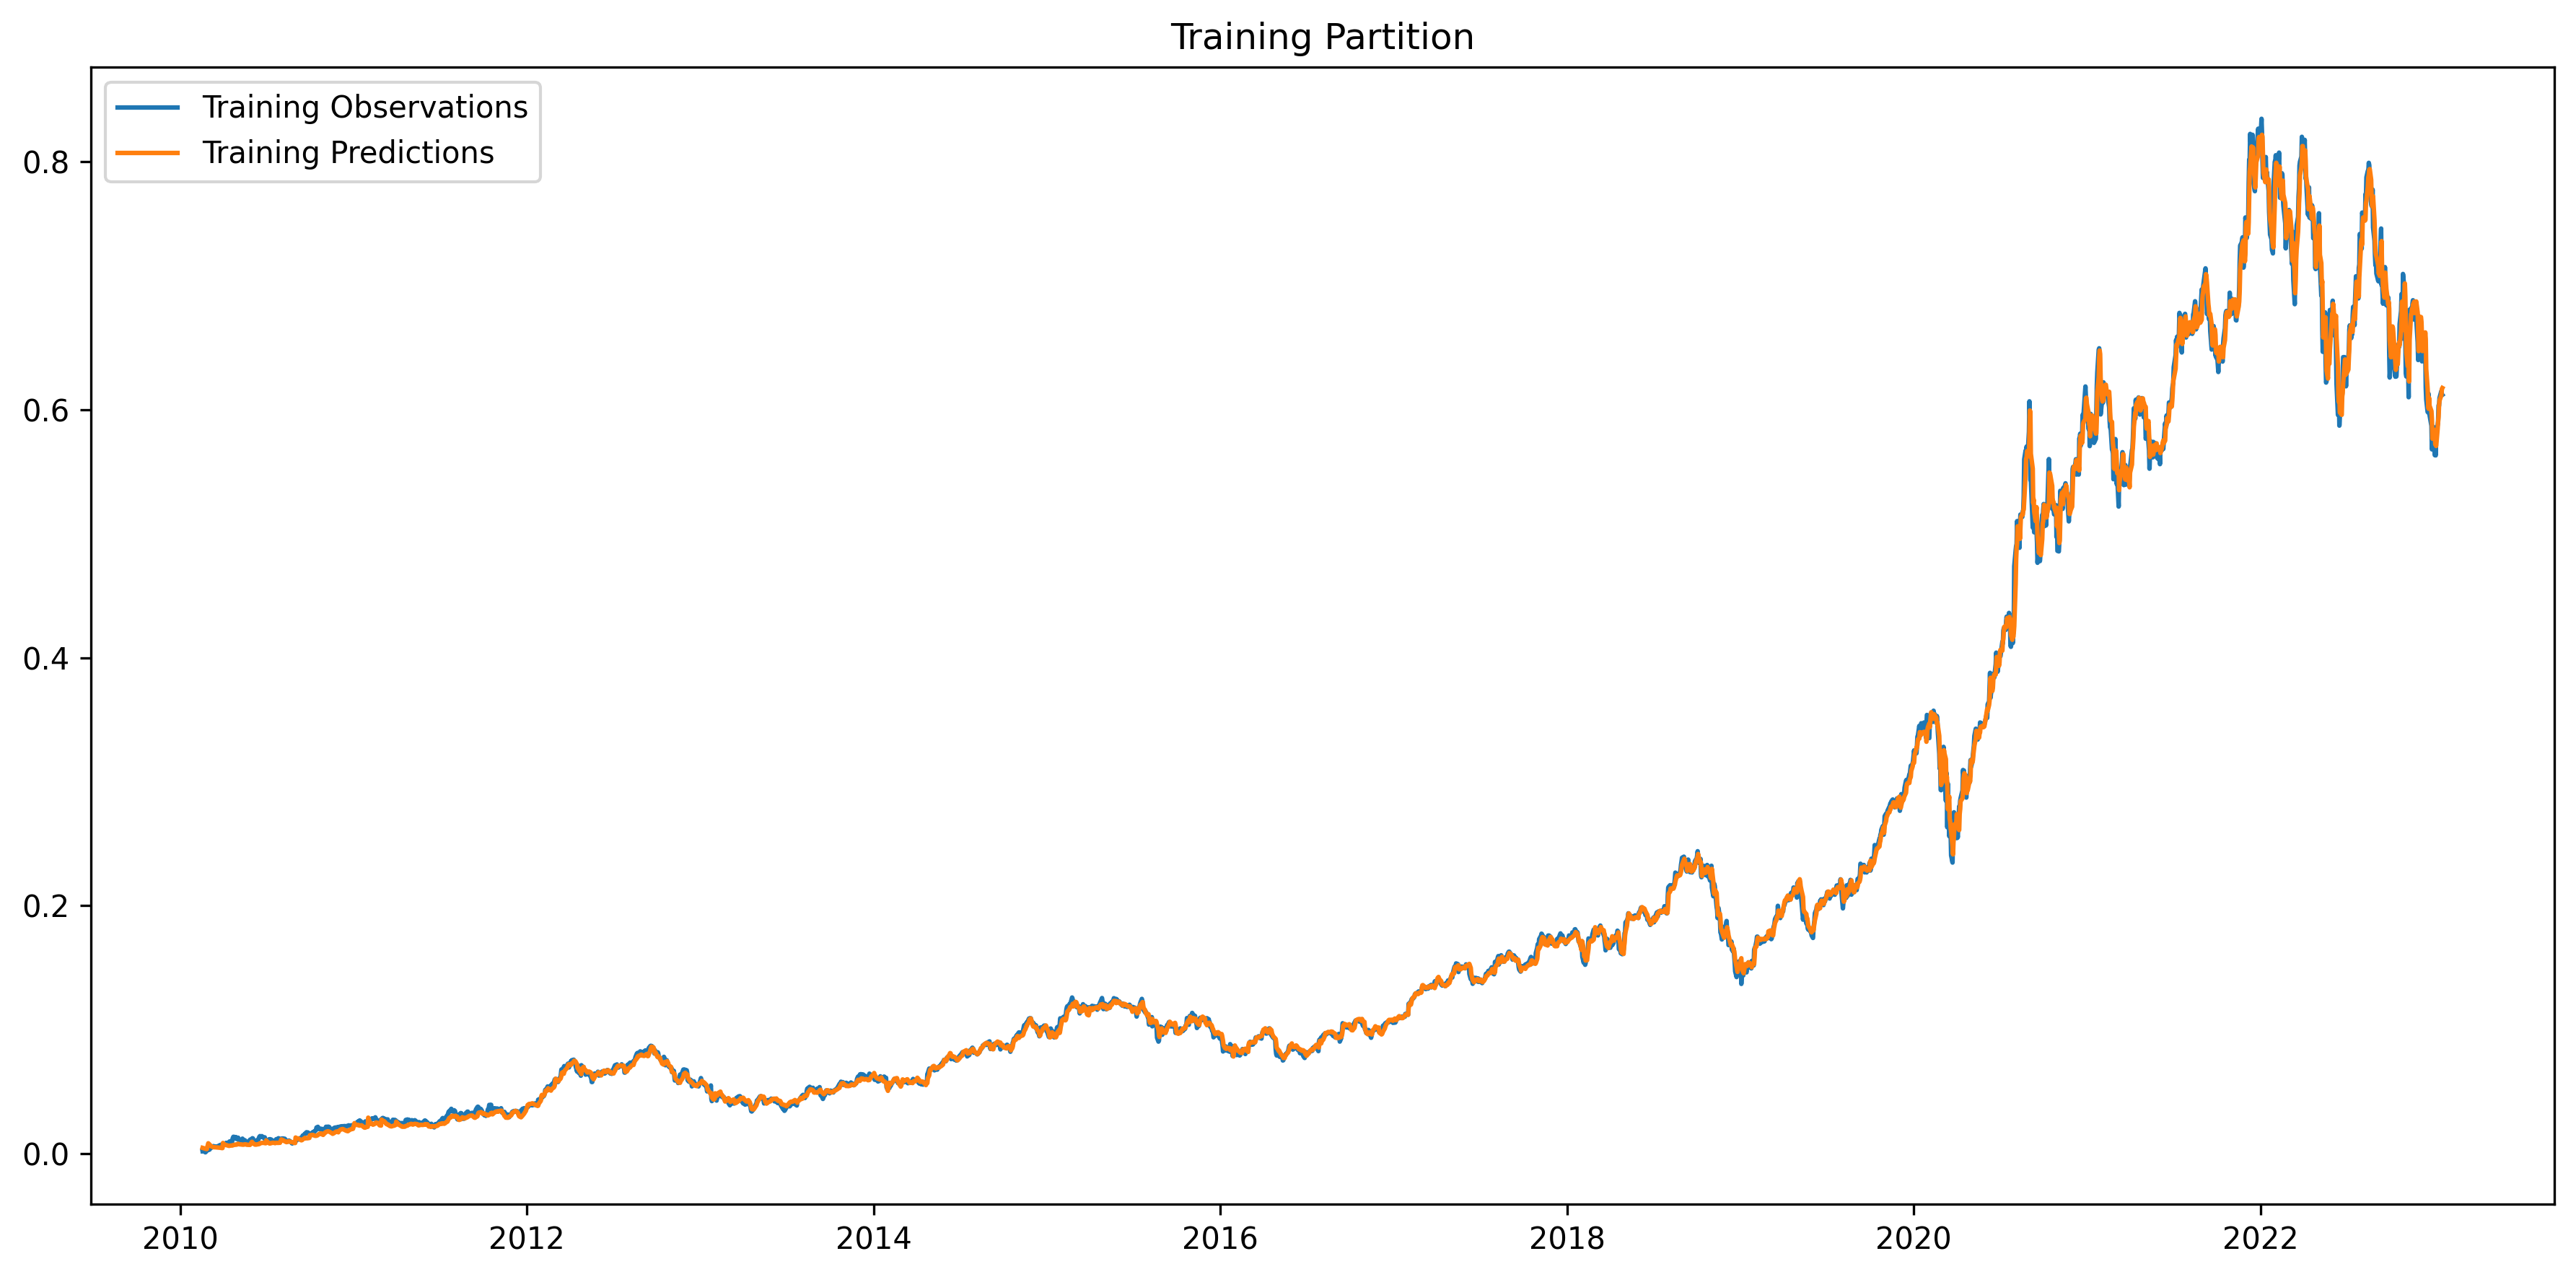

In [112]:
# Training set visualization

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates[0:train_size], y_train, label='Training Observations')
ax.plot(dates[0:train_size], model_functional.predict([X_train, X_static_train]).flatten(), label='Training Predictions')
ax.set_title('Training Partition')
ax.legend()
        
plt.tight_layout()
plt.show()

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


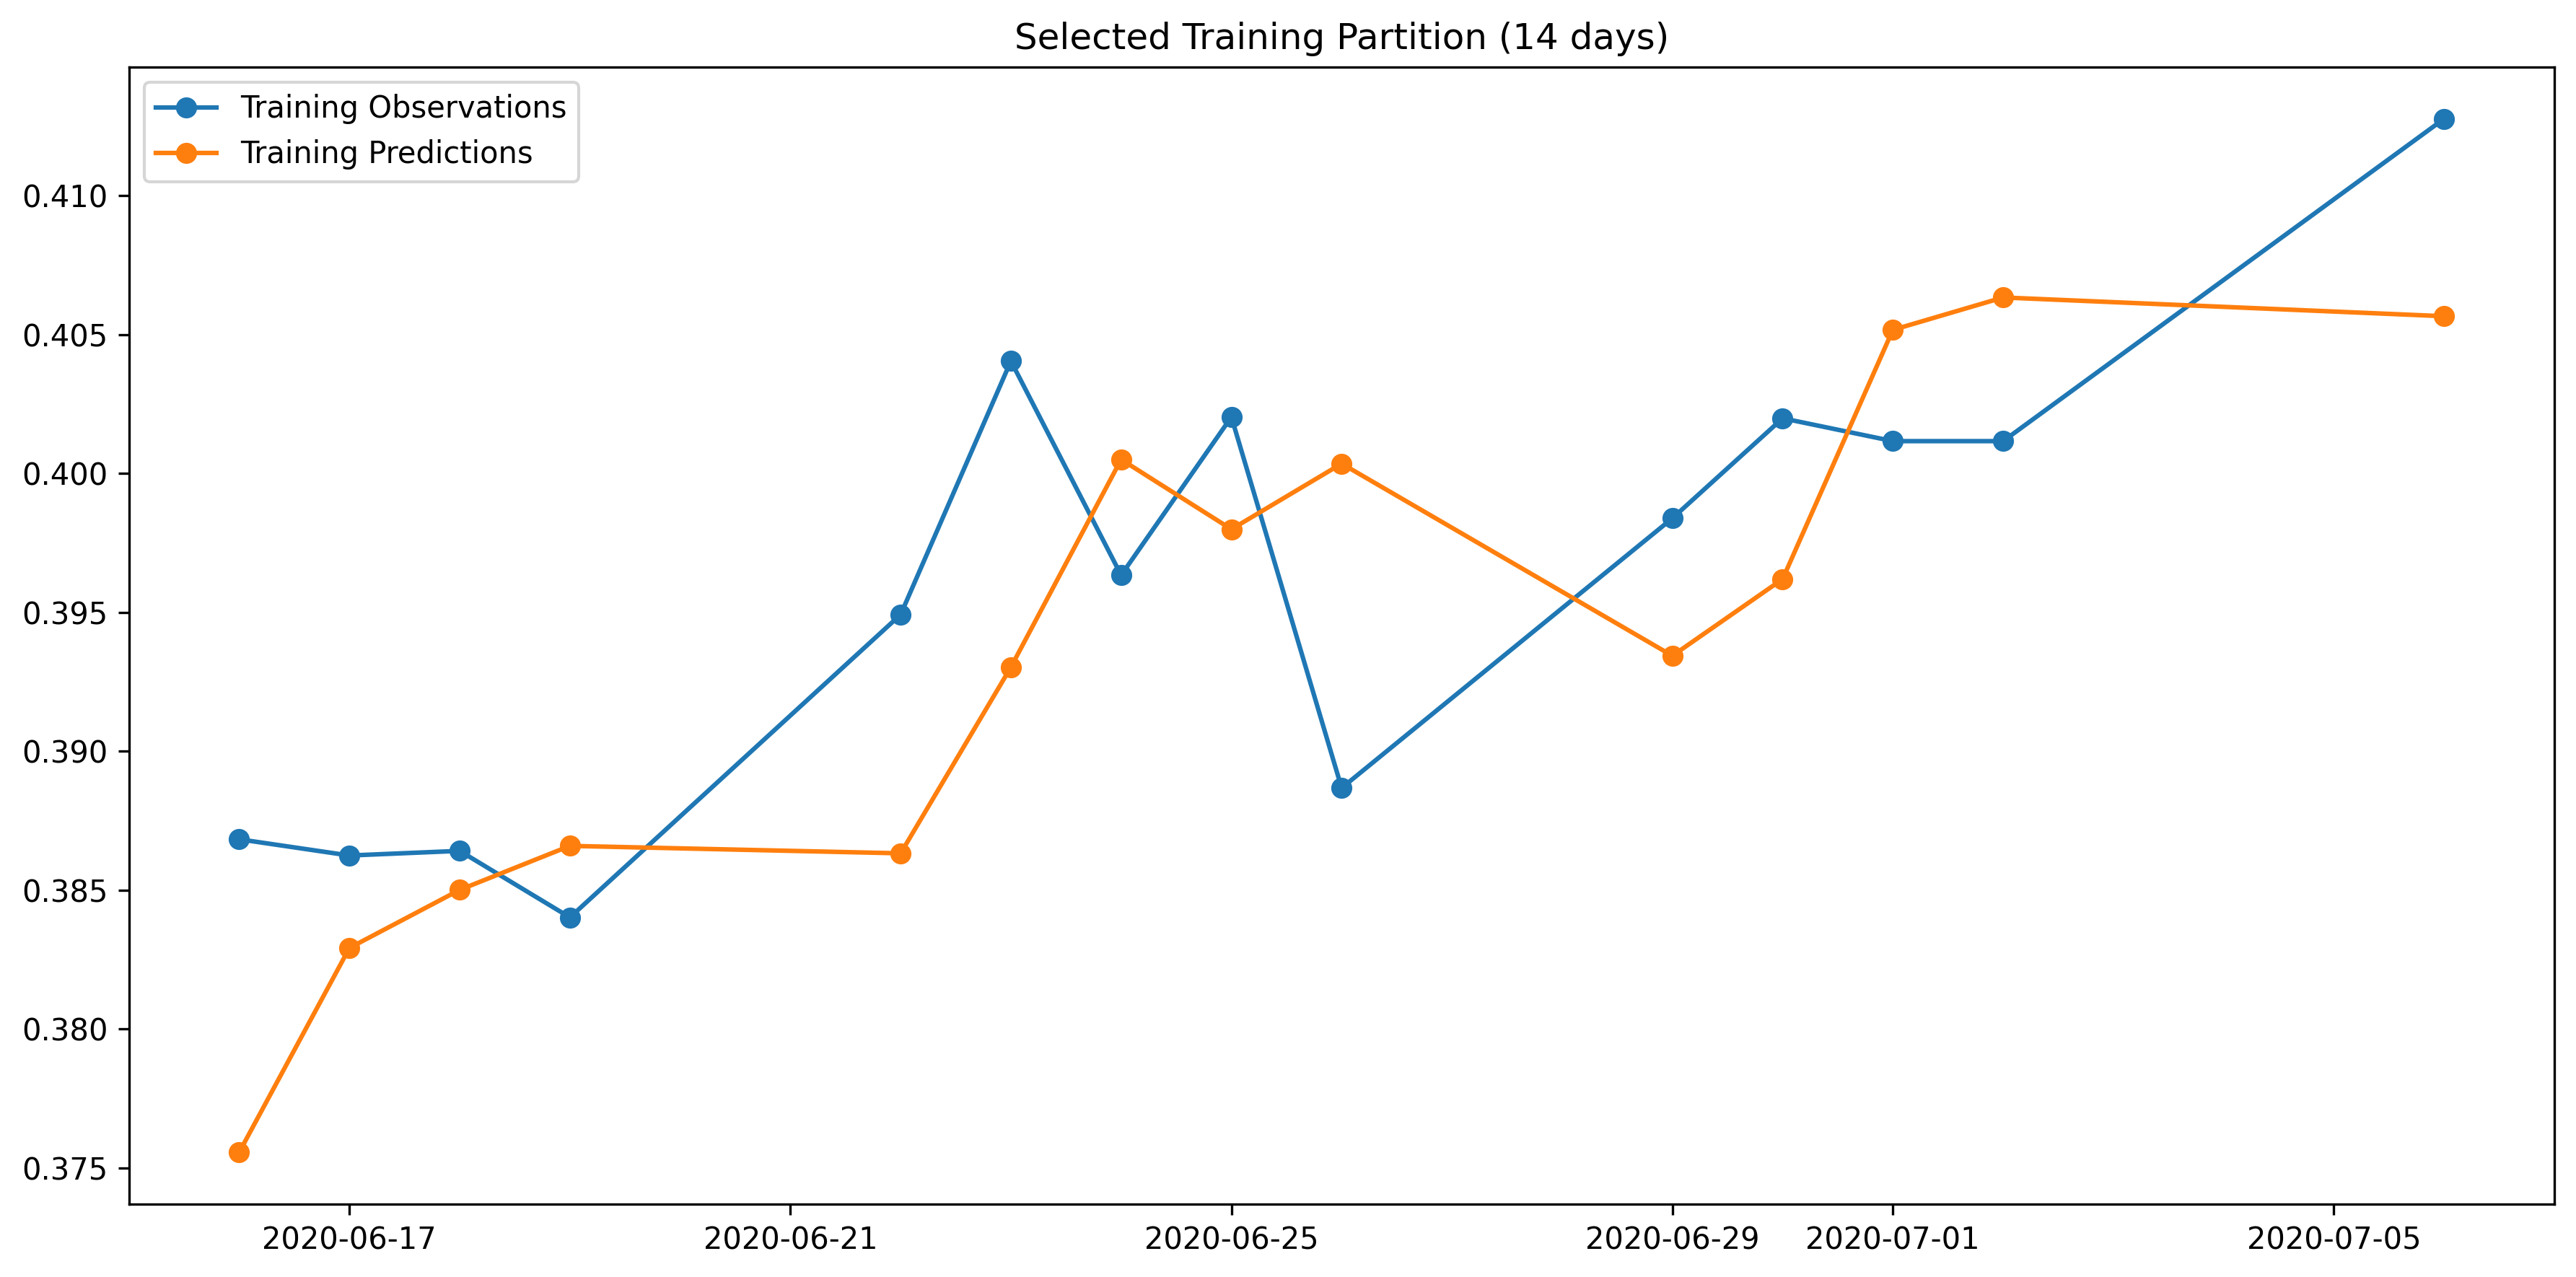

In [113]:
# Training subset visualization

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates[2600:2614], y_train[2600:2614], label='Training Observations', marker='o')
ax.plot(dates[2600:2614], model_functional.predict([X_train, X_static_train]).flatten()[2600:2614], label='Training Predictions', marker='o')
ax.set_title('Selected Training Partition (14 days)')
ax.legend()
        
plt.tight_layout()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


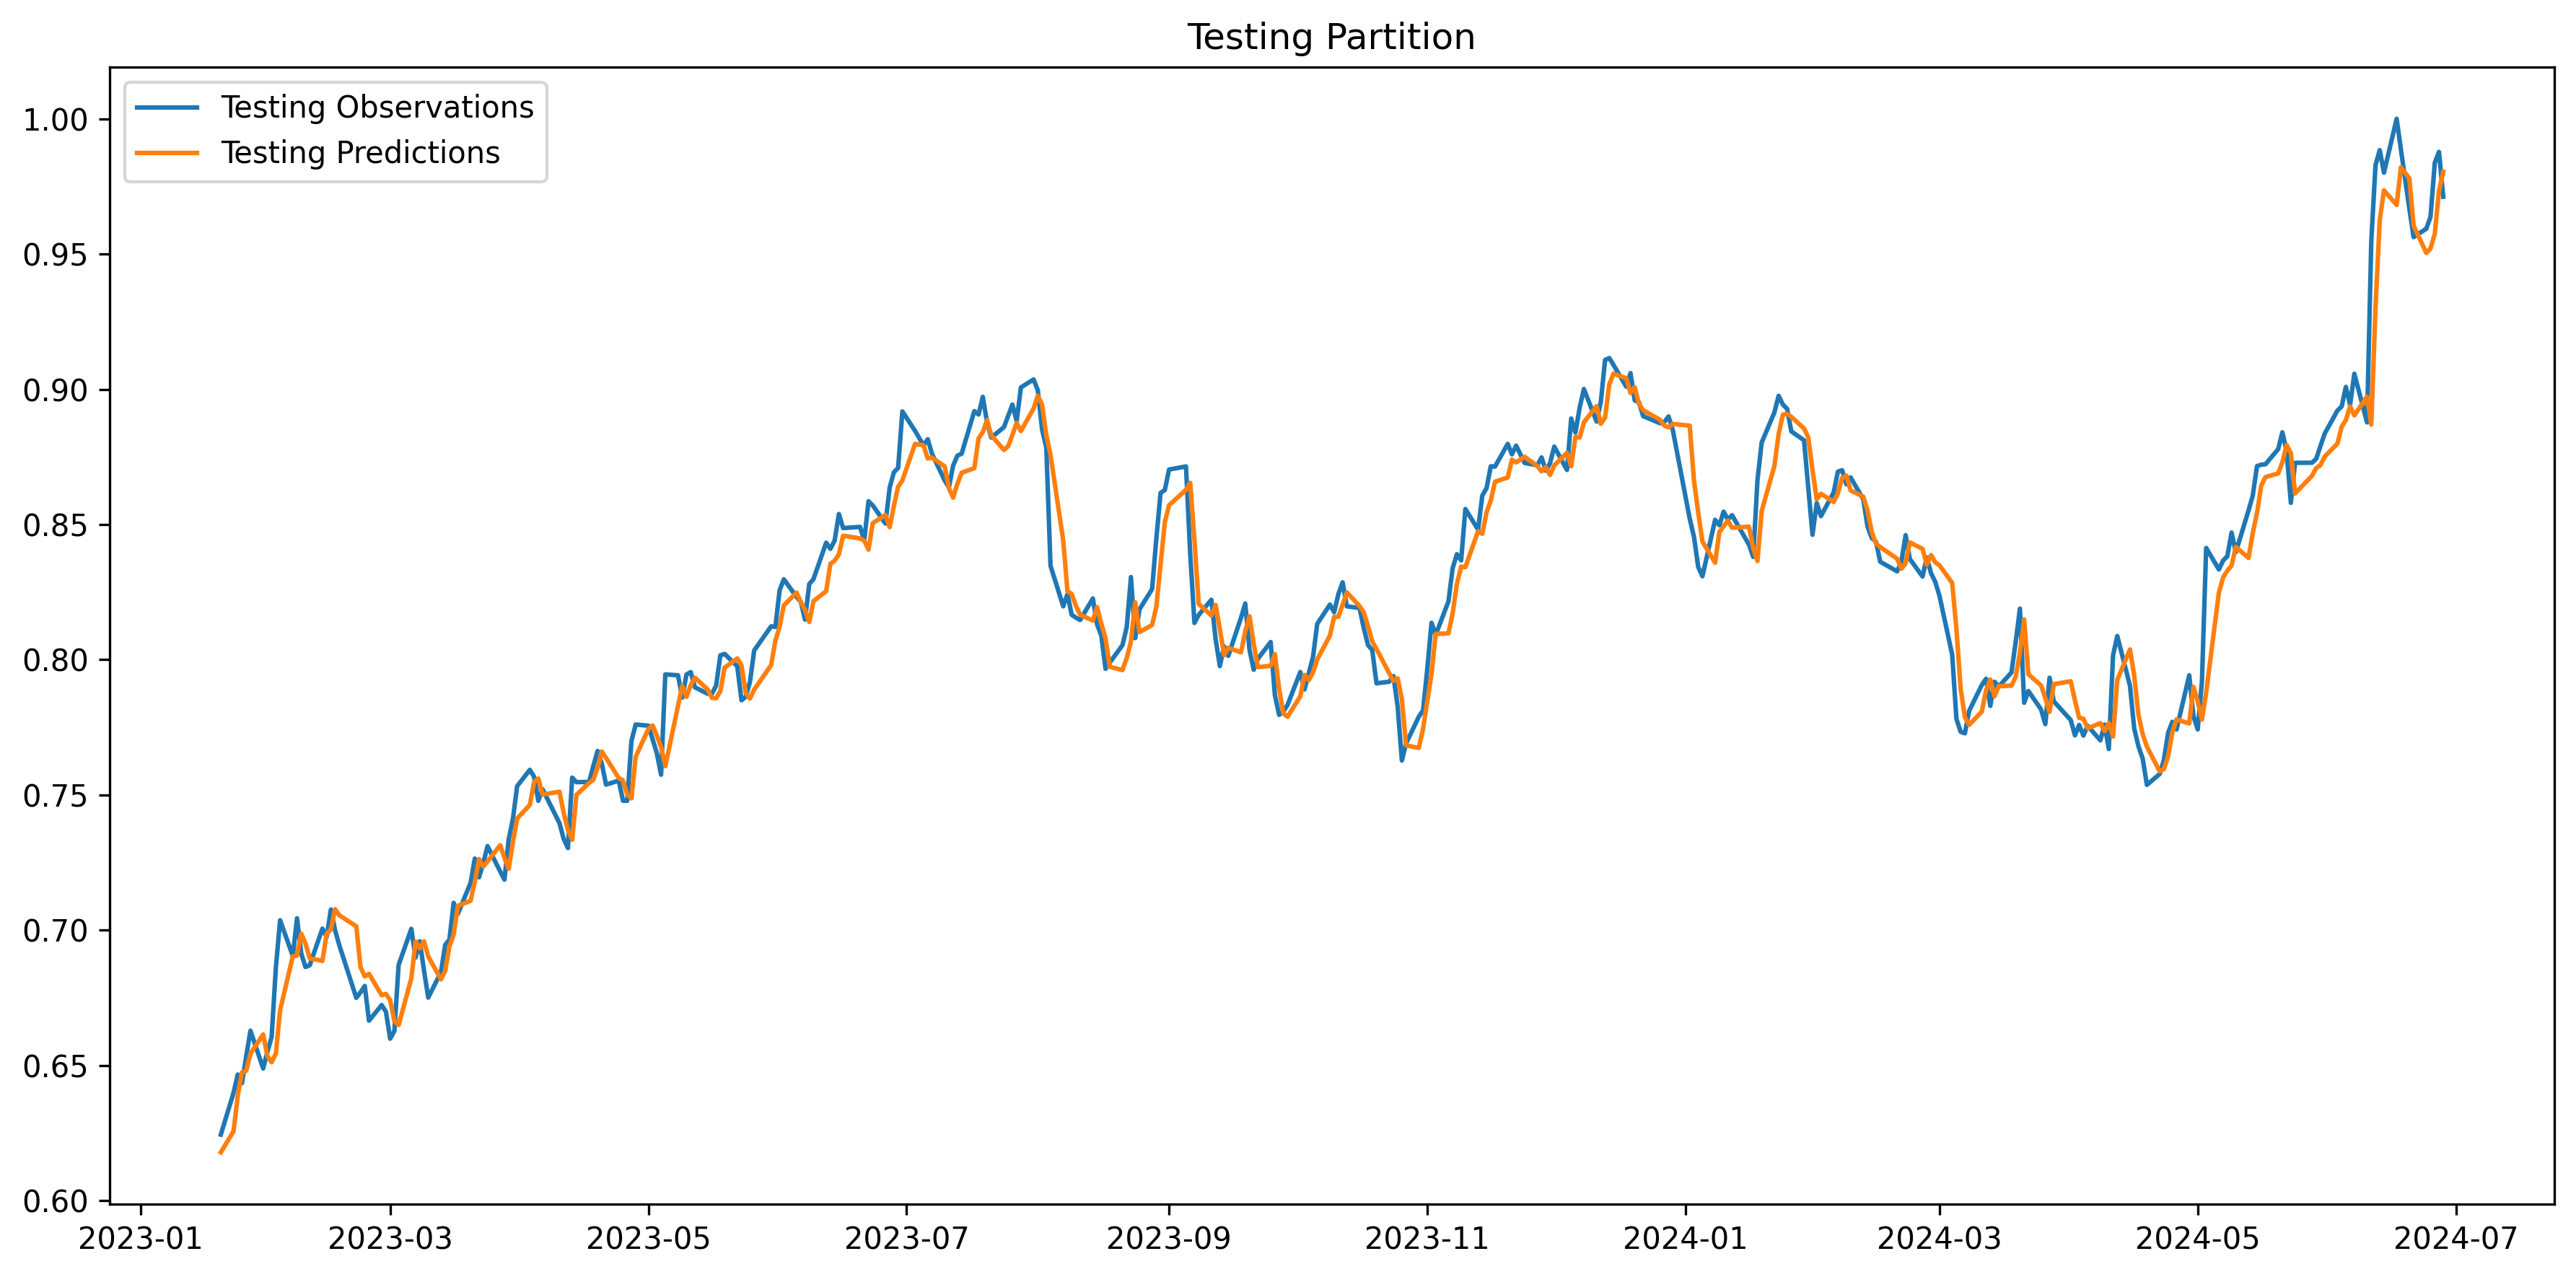

In [114]:
# Testing visualization

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates[train_size:], y_test, label='Testing Observations')
ax.plot(dates[train_size:], model_functional.predict([X_test, X_static_test]).flatten(), label='Testing Predictions')
ax.set_title('Testing Partition')
ax.legend()
        
plt.tight_layout()
plt.show()

In [116]:
# Save model

model_functional.save('../models/functional_LSTM.keras')